In [27]:
# Importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
df= pd.read_csv("datos/datos_estan_sinout.csv")

In [29]:
df.columns.unique()

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'showAddress', 'distance', 'status', 'newDevelopment',
       'floor', 'district', 'neighborhood', 'hasLift', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'typology', 'subTypology',
       'priceByArea_knn', 'parkingSpacePrice_knn'],
      dtype='object')

In [30]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[['price', 'rooms','bathrooms','priceByArea_knn']])
df[['price_robust', 'rooms_robust','bathrooms_robust','priceByArea_knn_robust']] = datos_transf_robust

escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df[['price', 'rooms','bathrooms','priceByArea_knn']])
df[["price_min_max", "rooms_min_max", "bathrooms_min_max","priceByArea_knn_min_max"]]  = datos_transf_min_max

escalador_estandar = StandardScaler()
datos_transf_estandar = escalador_estandar.fit_transform(df[['price', 'rooms','bathrooms','priceByArea_knn']])
df[['price_stan', 'rooms_stan','bathrooms_stan','priceByArea_knn_stan']]  = datos_transf_estandar

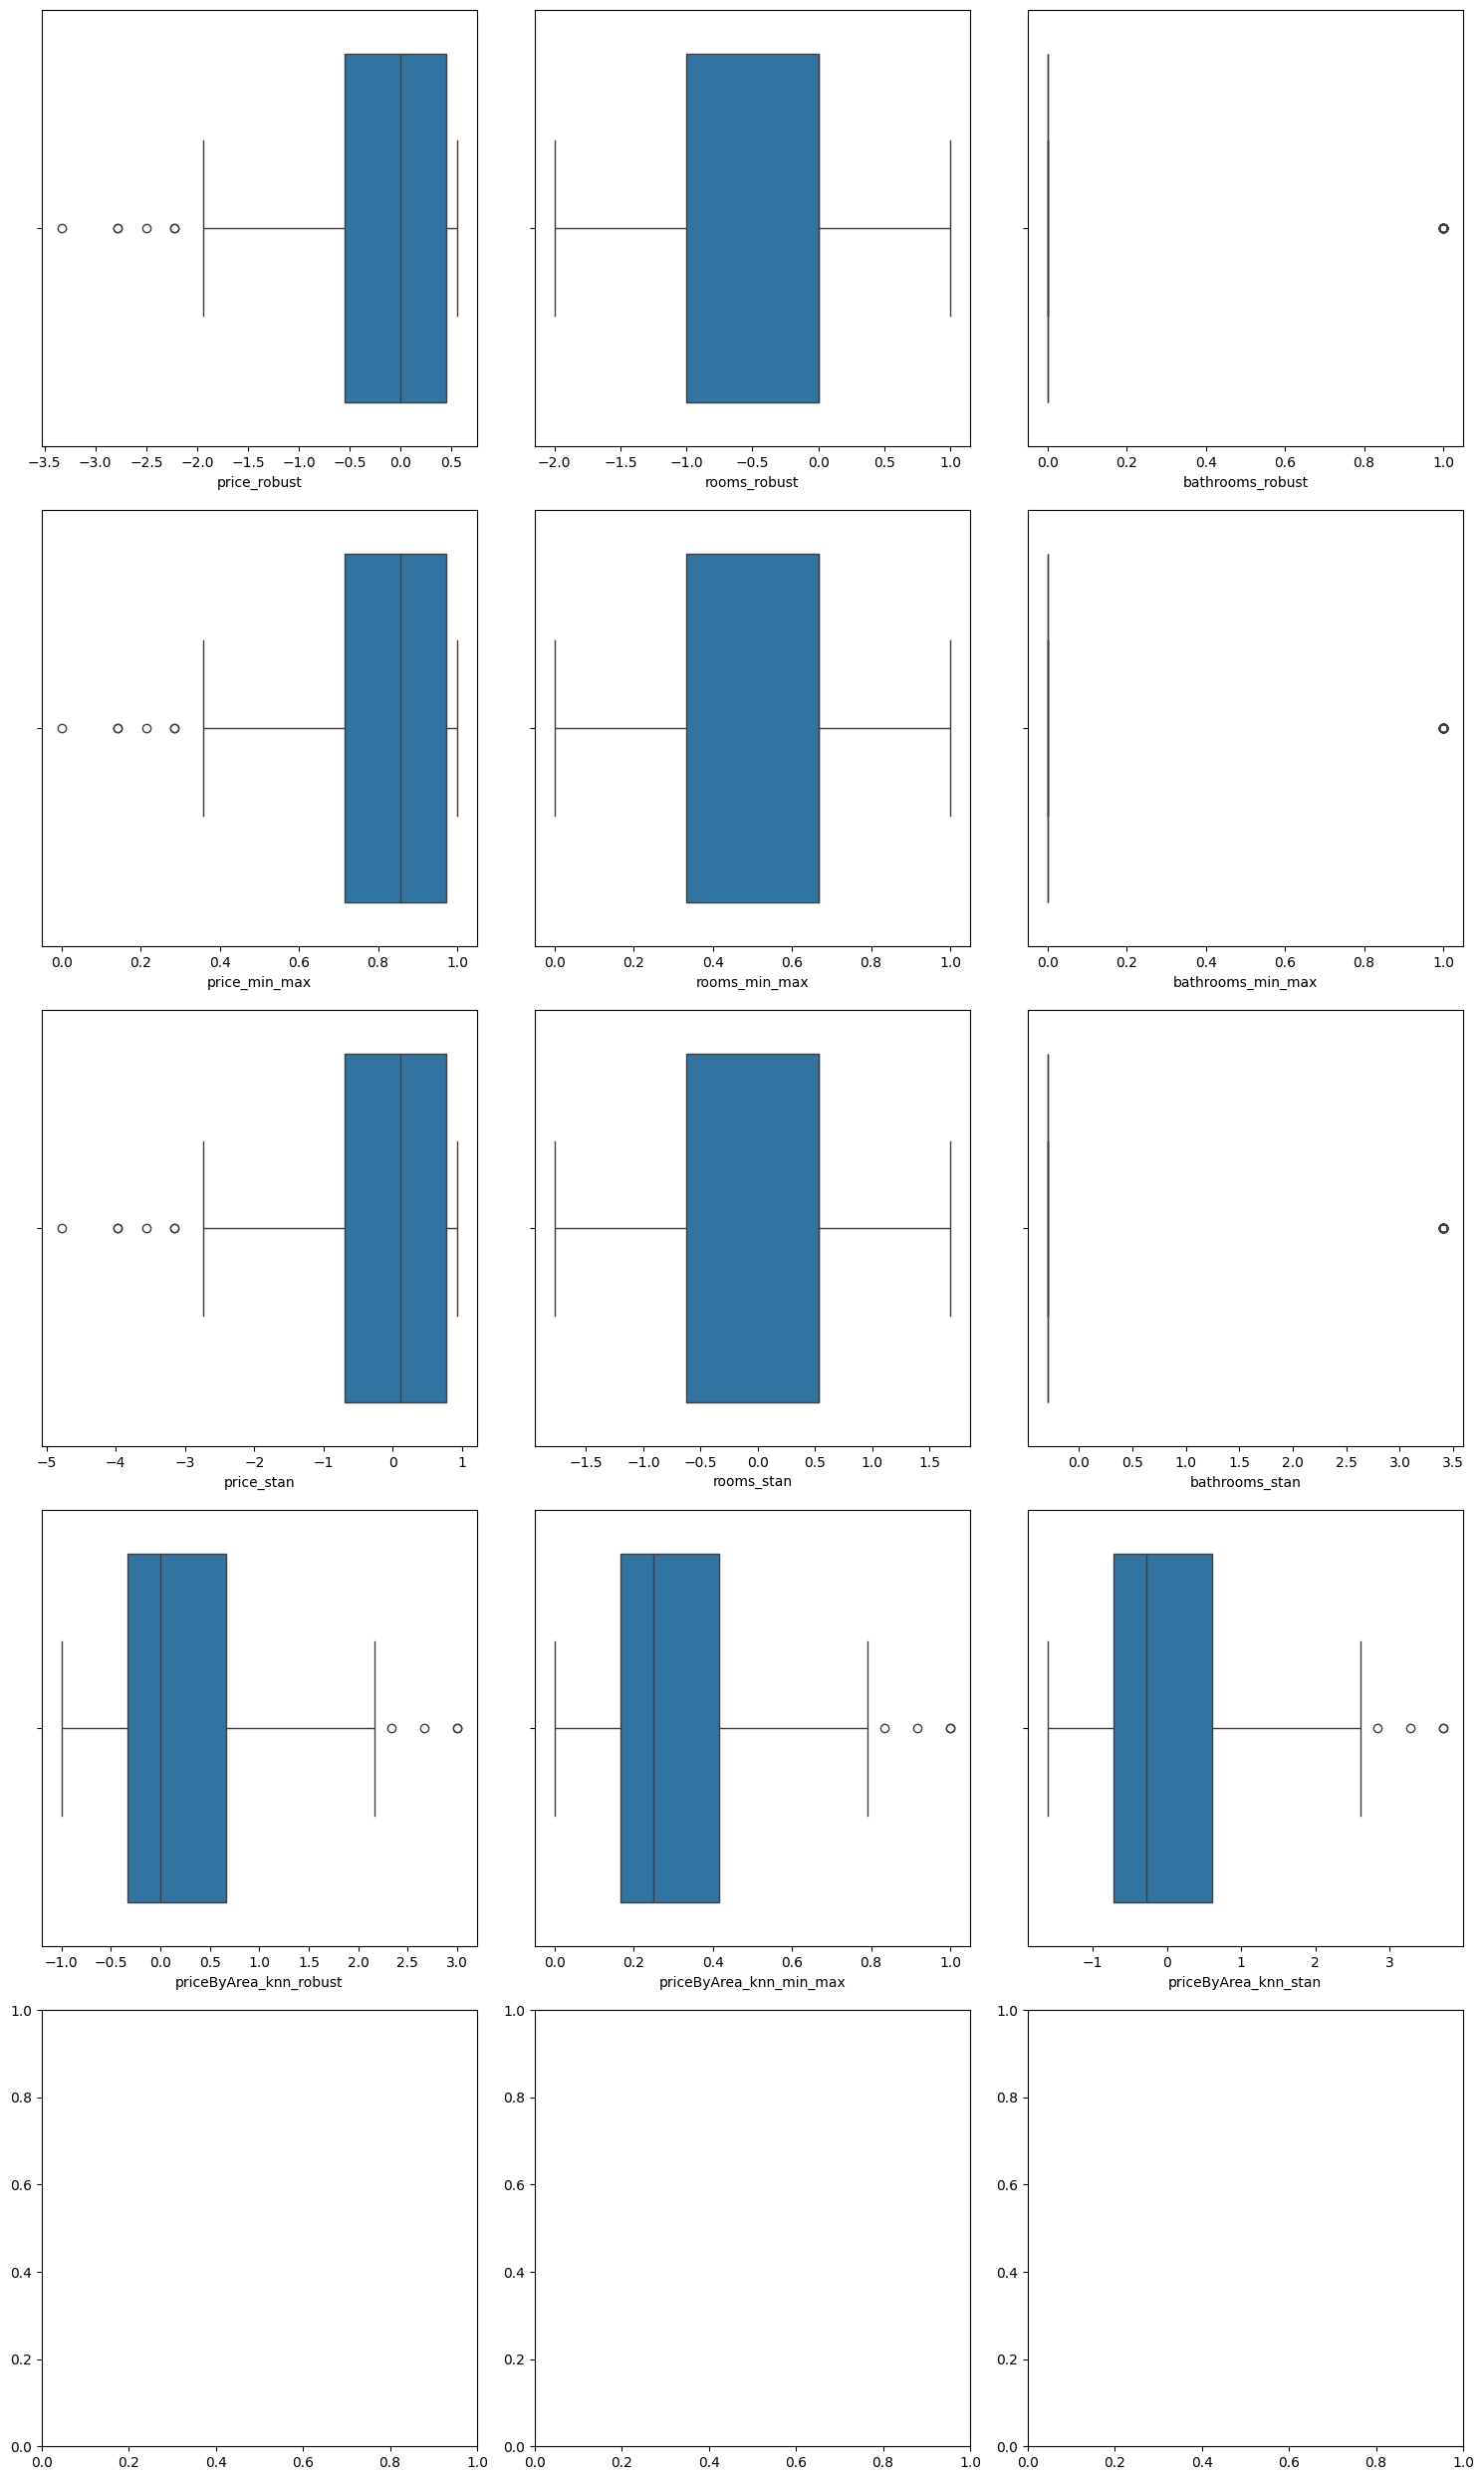

In [31]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))

sns.boxplot(x="price_robust", data=df, ax=axes[0][0])
sns.boxplot(x="rooms_robust", data=df, ax=axes[0][1])
sns.boxplot(x="bathrooms_robust", data=df, ax=axes[0][2])

sns.boxplot(x="price_min_max", data=df, ax=axes[1][0])
sns.boxplot(x="rooms_min_max", data=df, ax=axes[1][1])
sns.boxplot(x="bathrooms_min_max", data=df, ax=axes[1][2])

sns.boxplot(x="price_stan", data=df, ax=axes[2][0])
sns.boxplot(x="rooms_stan", data=df, ax=axes[2][1])
sns.boxplot(x="bathrooms_stan", data=df, ax=axes[2][2])

sns.boxplot(x="priceByArea_knn_robust", data=df, ax=axes[3][0])
sns.boxplot(x="priceByArea_knn_min_max", data=df, ax=axes[3][1])
sns.boxplot(x="priceByArea_knn_stan", data=df, ax=axes[3][2])

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.show()


In [32]:
escalador_robust

RobustScaler()

In [33]:
# nos vamos a quedar con el robus
df.drop(columns=['price_min_max', 'rooms_min_max', 'bathrooms_min_max', 'priceByArea_knn_min_max', 
                 'price_stan', 'rooms_stan', 'bathrooms_stan', 'priceByArea_knn_stan'], inplace=True)



In [34]:
df.to_csv("datos/datos_stan_estan.csv")